In [13]:
# MODULE IMPORT
import os # For manipulating system information (file & folder paths and related)
from skimage import io # For importing and saving images
from skimage import exposure # For improving contrast and brightness in an image
from skimage import img_as_float # To transform an 8 bit image to floating points
from skimage.color import * # For color manipulation and transforming
import matplotlib.pyplot as plt # for plotting all the figures
from skimage import filters # for thresholding algorithms
from skimage import morphology # for dilation, erosion and other binary transforms
import numpy as np # for array manipulation
from IPython.display import clear_output # Used to avoid output cluttering
from tkinter import Tcl # Module used for intelligent sorting of lists
import scipy.ndimage as ndi 
%matplotlib inline
# Required for viewing images in silico

# The modules listed below may or may not be necessary depending on the code executed

#import re # Regex module for powerful manipulation of strings
# import skimage.feature as skfeat # for detecting ROIs and OOIs
# from math import *
from scipy import stats # Module used for statistical analysis of data obtained from images

In [2]:
# Search a specific directory to find the images

days = 5 # Number of days that the images were taken

''' Search directory is the root directory where the search is going to be conducted; Inside this directory there should be various folders corresponding
to each of the plant variants (WT, BFP, Venus, etc.). Inside each of these folders there should be DAYS subfolders, corresponding to
each of the days the experiment was conducted.'''

search_directory = '/Users/Teoric/Desktop/5DAYS/'
os.chdir(search_directory) #CAMBIAR DIRECTORIO AL ESPECIFICADO
# cwd = os.getcwd() PARA VER EL DIRECTORIO ACTUAl
paths = [os.path.join(search_directory, f) for f in os.listdir(search_directory)]
# os.listdir lists all filenames and directories in a given folder path
# os.path.join joins all the filenames and subdirectories found with the main path (search_directory)
paths.sort() # Sort all paths in alphabetical order

In [5]:
# First custom function; used for the extraction of every image file and their corresponding name

def filesAndNames(days, paths):

    '''
    This function is used for extracting the full filepath for .TIF images from specified paths. Function takes as input:

    Days - Number of days the experiment was conducted.
    Paths - Array containing each of the image type folder paths.

    It produces as output:

    all_files - Array of arrays, each of which contains every image found within the folders
    all_names - Array of arrays, each of which contains the NAME of every image found within the folders
    '''

    all_files = [[] for i in range(days)]
    all_names = [[] for i in range(days)]

    for i in range(len(paths)):

        if 'DS_Store' in paths[i]:
            
            continue

        elif 'WT' in paths[i]:
        
            print('This folder contains wild type Mp photos')
            os.chdir(paths[i]) #cambiar directorio a donde esta el wt
            files = filter(os.path.isfile, os.listdir(paths[i])) #solo los que sean archivos
            files = [os.path.join(paths[i], f) for f in files] #guarda los path
            files = list(map(lambda x: x.replace("\\", "/"), files))
            names = []
            for file in files:
                
                filename, ext = os.path.splitext(file) #conseguir extension del archivo
                
                # CHANGE THE EXTENSION TO TIFF OR TIF FOR IMAGE FILES
                if ext == '.tif':
                    names.append(filename.split(search_directory+'WT/')[1])
                else:
                    continue
                    
                      # We sort all files in the folder
                    
            sorted_files = Tcl().call('lsort', '-dict', files)
            sorted_names = Tcl().call('lsort', '-dict', names)
            
            for i in range(0, len(sorted_files)):
                
                filename, ext = os.path.splitext(sorted_files[i])
                first_split = filename.split(' ', 1)
                second_split = first_split[1].split(' ')[0] # This gives us the specific day

                if second_split == '0':
                    all_files[0].append(sorted_files[i])
                    all_names[0].append(sorted_names[i])
                    continue
                    
                elif second_split == '1':
                    all_files[1].append(sorted_files[i])
                    all_names[1].append(sorted_names[i])
                    continue
                    
                elif second_split == '2':
                    all_files[2].append(sorted_files[i])
                    all_names[2].append(sorted_names[i])
                    continue
                    
                elif second_split == '3':
                    all_files[3].append(sorted_files[i])
                    all_names[3].append(sorted_names[i])
                    continue
                
                elif second_split == '4':
                    all_files[4].append(sorted_files[i])
                    all_names[4].append(sorted_names[i])
                    continue
        else:
        
            print('This folder contains brightfield and fluorescence photos')
            os.chdir(paths[i])
            folders = filter(os.path.isdir, os.listdir(paths[i]))
            folders = [os.path.join(paths[i], f) for f in folders]
            names = []
            
            # Since for all transformed plants we have two subfolders within the main folder,
            # we must loop through all brightfield photos in the brightfield folder and all
            # fluorescent photos in the fluorescent folder    
            
            for folder in folders:
                
                if 'Fluo' in folder:
                    
                    print('Analyzing fluorescent picture folder')
                    
                    os.chdir(folder)
                    files = filter(os.path.isfile, os.listdir(folder))
                    files = [os.path.join(folder, f) for f in files]
                    files = list(map(lambda x: x.replace("\\", "/"), files))
                    names = []
                    
                    for file in files:
                        
                        filename, ext = os.path.splitext(file)
                        #CHANGE THE EXTENSION TO TIFF OR TIF FOR IMAGE FILES
                        if ext == '.tif':
                            name = file.rsplit('/', 2)[2]
                            name = name.rsplit('.')[0]
                            names.append(name)
                        else:
                            continue
                            # We sort all files in the folder
                    
                    sorted_files = Tcl().call('lsort', '-dict', files)
                    sorted_names = Tcl().call('lsort', '-dict', names)
                    
                    for i in range(0, len(sorted_files)):

                        filename, ext = os.path.splitext(sorted_files[i])
                        first_split = filename.split(' ', 1)
                        second_split = first_split[1].split(' ')[1] # This gives us the specific day
                        
                        if second_split == '0':
                            all_files[0].append(sorted_files[i])
                            all_names[0].append(sorted_names[i])
                            continue

                        elif second_split == '1':
                            all_files[1].append(sorted_files[i])
                            all_names[1].append(sorted_names[i])
                            continue

                        elif second_split == '2':
                            all_files[2].append(sorted_files[i])
                            all_names[2].append(sorted_names[i])
                            continue

                        elif second_split == '3':
                            all_files[3].append(sorted_files[i])
                            all_names[3].append(sorted_names[i])
                            continue

                        elif second_split == '4':
                            all_files[4].append(sorted_files[i])
                            all_names[4].append(sorted_names[i])
                            continue
         
                elif 'Campo' in folder or 'Claro' in folder:
                    
                    print('Analizing brightfield picture folder')
                    
                    os.chdir(folder)
                    files = filter(os.path.isfile, os.listdir(folder))
                    files = [os.path.join(folder, f) for f in files]
                    files = list(map(lambda x: x.replace("\\", "/"), files))
                    names = []
                    for file in files:

                        filename, ext = os.path.splitext(file)
                        #CHANGE THE EXTENSION TO TIFF OR TIF FOR IMAGE FILES
                        if ext == '.tif':
                            name = file.rsplit('/', 2)[2]
                            name = name.rsplit('.')[0]
                            names.append(name)
                        else:
                            continue
                        
                    # We sort all files in the folder
                    
                    sorted_files = Tcl().call('lsort', '-dict', files)
                    sorted_names = Tcl().call('lsort', '-dict', names)

               

                    for i in range(0, len(sorted_files)):

                        filename, ext = os.path.splitext(sorted_files[i])
                        first_split = filename.split(' ', 1)
                        second_split = first_split[1].split(' ')[1] # This gives us the specific day
                        
                    #    print('File:', filename, '\nDay:', second_split)

                        if second_split == '0':
                            all_files[0].append(sorted_files[i])
                            all_names[0].append(sorted_names[i])
                            continue

                        elif second_split == '1':
                            all_files[1].append(sorted_files[i])
                            all_names[1].append(sorted_names[i])
                            continue

                        elif second_split == '2':
                            all_files[2].append(sorted_files[i])
                            all_names[2].append(sorted_names[i])
                            continue

                        elif second_split == '3':
                            all_files[3].append(sorted_files[i])
                            all_names[3].append(sorted_names[i])
                            continue

                        elif second_split == '4':
                            all_files[4].append(sorted_files[i])
                            all_names[4].append(sorted_names[i])
                            continue

       # clear_output(wait=True) # Comment out this line if you would like to see the all the files detected

    return all_files, all_names

all_files, all_names = filesAndNames(days, paths)

This folder contains brightfield and fluorescence photos
Analizing brightfield picture folder
Analyzing fluorescent picture folder
This folder contains brightfield and fluorescence photos
Analizing brightfield picture folder
Analyzing fluorescent picture folder
This folder contains brightfield and fluorescence photos
Analizing brightfield picture folder
Analyzing fluorescent picture folder
This folder contains brightfield and fluorescence photos
Analizing brightfield picture folder
Analyzing fluorescent picture folder
This folder contains brightfield and fluorescence photos
Analizing brightfield picture folder
Analyzing fluorescent picture folder
This folder contains brightfield and fluorescence photos
Analizing brightfield picture folder
Analyzing fluorescent picture folder
This folder contains brightfield and fluorescence photos
Analizing brightfield picture folder
Analyzing fluorescent picture folder
This folder contains brightfield and fluorescence photos
Analizing brightfield pict

In [6]:
# We now define all the functions we will use for the analysis

def openImage(file):
    
    '''
    Open the TIF or TIFF file as a three dimensional array for further manipulation
    Input:
        - file: string which corresponds to the filepath of the image
    Output:
        - img: three dimensional array that contains all the image information
    '''
    
    img = io.imread(file)
    
    return img

def plotImage(image, index, day, plant):

    '''
    Plot a specific image, given a specific plant number, day and plant type
    Input:
        - image: (Array) Three dimensional array containing the RGB image information.
        - index: (Int) Integer number, has to be a number between the plant number 1 and the plant number N, where N is the number of total plants of a specific type.
        - day: (Int) Integer number, has to be a number between Day 0 and Day N, where N is the total number of days the experiment ran.
        - plant: (Str) String corresponding to the plant type, for example: BFPN7, BFPLTI, VENUSN7, etc.
    Output:
        - Matplotlib figure showing the image requested
    '''
    
    specific_names = [name for name in all_names[day] if plant in name or plant.upper() in name or plant.lower() in name]
    
    plt.figure(figsize=(5,5), dpi=200)
    plt.title(specific_names[index])
    plt.imshow(image, cmap='gray')

def exporsureAndContrast(image):

    '''
    Function used for Contrast Limited Adaptive Image Equalization (CLAHE).
    Inputs:
        - image: Three dimensional (RGB) or One dimensional array (Greyscale) image information.
    Output:
        - clahe_img: Three dimensional (RGB) or One dimensional array (Greyscale) image, with an equalized histogram.
    '''
    
    clahe_img = exposure.equalize_adapthist(image, clip_limit=0.02)
    
    return clahe_img
    
def image2HSV(image):

    '''
    Function used for the conversion of RGB images to HSV color space (Hue Saturation Value)
    Input:
        - image: Three dimensional (RGB) array, containing image information. Array cannot be Greyscale or any other dimensions than RGB
    Output:
        - img_HSV: Three dimensional (HSV) array, containing image information in HSV color space
    '''
    
    img_HSV = rgb2hsv(image)
    
    return img_HSV

def firstSegmentation(image):

    '''
    Function used for segmentation of OOIs from a given image 
    '''

    thresh = filters.threshold_otsu(image[:,:,2])
    
    binary = image[:,:,2] < thresh-0.13
    
    return binary

def secondSegmentation(image):
    
    thresh = filters.threshold_otsu(image)
    
    binary = image > thresh
    
    return binary

def objectProcessing(image):
    
    # With this function we will process the image to remove small objects and fill in holes
    # between areas of interest
    
    # Remove small objects
    
    # Binary Closing the gaps
    # For the binary closing we need to define a 2 dimensional array which will determine the
    # pattern for the closing
    
    img_closing = morphology.binary_closing(image, selem=np.ones((30,30)))
    
    img_wo = morphology.remove_small_objects(img_closing, min_size=10000)
    
    img_closing2 = morphology.binary_closing(img_wo, selem=np.ones((15,15)))
    
    img_fill = ndi.binary_fill_holes(img_closing2)
    
    img_eroded = morphology.binary_erosion(img_fill, selem=np.ones((5,5)))
    
    return img_eroded

def area_count(binary_img):
    
    count = 0
    
    for row in binary_img:
        
        for pixel in row:
        
            if pixel == False:

                continue

            else:

                count += 1
            
    return (count)

def analyzeCAM1(files, day, names):
    
    '''
    Used for brightfield analysis
    '''
    
    # We declare local scope variables
    
    cam1 = [file for file in files[day] if ('WT' or 'Wt') in file]
    cam1_names = [name for name in names[day] if ('WT' or 'Wt') in name]
    
    global area_values_cam1
    
    area_values_cam1 = []
    
    # cam1 is now a list that contains only CAM1 brightfield images
    
    for i in range(len(cam1)):
        
        print('Analyzing brightfield WT image', cam1_names[i], i, 'of', len(cam1)) # Check the progress of algorithm
        
        # Read the image
        
        img = openImage(cam1[i])
        
        # Convert to HSV color space for better segmentation
        
        HSV = image2HSV(img)
        
        # Segmentation
        
        segmented = firstSegmentation(HSV)
        
        wo = objectProcessing(segmented)
        
        # Plot images
        
        #plotImage(wo, i, day, cam1) # This is optional (just if one wants to check the segmentation algorithm)
        
        # The approximate pixel size for a 4X objective is 5 micrometers per pixel, so we count the number of white pixels
        # in the image and obtain an approximate count of pixels that contribute to the area, we then multiply that
        # number by 25 to obtain the square micrometers of the plant
        
        area = area_count(wo)
        
        area_values_cam1.append(area*25)
        
        print('The approximate area for Image', cam1_names[i], 'is', area*25, 'square micrometers')
        
    return area_values_cam1#si la variable es global no es neceario ?

def analyzeRubyBFThallus(files, day, names):
    
    '''
    Analyze Ruby brightfield images
    Code is similar to WT brightfield analysis
    '''
    
    ruby = [file for file in files[day] if (('RUBY_T' in file) and ('F' not in file))]#la t siempre esta ...toma mas datos de los necesarios
    ruby_names = [name for name in names[day] if (('RUBY_T' in name) and ('F' not in name))]
    
    global area_ruby_t
    
    area_ruby_t = []
    
    for i in range(0, len(ruby)):
        
        print('Analyzing brightfield RUBY thallus image', ruby_names[i], i , 'of', len(ruby)) #solo agregue la i para saber en cual va
        
        img = openImage(ruby[i])
        
        HSV = image2HSV(img)
        
        segmented = firstSegmentation(HSV)
        
        wo = objectProcessing(segmented)
        
        #plotImage(wo, i, day, 'Ruby')
        
        area = area_count(wo)
        
        area_ruby_t.append(area*25)
        
        print('The approximate area for Image', ruby_names[i], 'is', area*25, 'square micrometers')
        
    return area_ruby_t
        
def analyzeRubyFLUOThallus(files, day, names):
        
    '''
    For RUBY fluorescent images we will analyze the red channel only
    '''
    
    ruby_fluo = [file for file in files[day] if (('RUBY_T' in file) and ('F' in file))]#lo mismo que antes...la t sobra
    ruby_fluo_names = [name for name in names[day] if (('RUBY_T' in name) and ('F' in name))]
    
    global intensity_ruby_t
    
    intensity_ruby_t= []

    for i in range(0, len(ruby_fluo)):
        
        print('Analyzing fluorescent RUBY thallus image', ruby_fluo_names[i], i, 'of', len(ruby_fluo))
        
        img = openImage(ruby_fluo[i])
        
        # We will use only the red channel for the fluorescence information 
        
        red_channel = img[:,:,0]
        
        # Segmentation
        
        segmented = secondSegmentation(red_channel)
        
        wo = objectProcessing(segmented)
        
        # We apply the mask to each of the channels (R G and B)
    
        r = img[:,:,0]*wo
        g = img[:,:,1]*wo
        b = img[:,:,2]*wo
        
        # Final segmented image stacked into RGB
    
        final_rgb = np.dstack((r,g,b))
        
        # For the intensity calculation we convert the RGB image to greyscale
    
        greyscale_final = rgb2gray(final_rgb)
    
        intensity = round(np.sum(greyscale_final), 2)
        
        intensity_ruby_t.append(intensity)
        
        print('The intensity of the fluorescence for image', ruby_fluo_names[i], 'is', intensity) 
    
    return

def analyzeRubyBFSpore(files, day, names):
    
    '''
    Analyze Ruby brightfield images
    Code is similar to WT brightfield analysis
    '''
    
    ruby = [file for file in files[day] if (('RUBY_E' in file) and ('F' not in file))] #saque los filtros innecesarios deje solo la parte de ruby_e
    ruby_names = [name for name in names[day] if (('RUBY_E' in name) and ('F' not in name))]
    
    global area_ruby_e
    
    area_ruby_e = []
    
    for i in range(0, len(ruby)):
        
        print('Analyzing brightfield RUBY spore image', ruby_names[i], i, 'of', len(ruby))#i
        
        img = openImage(ruby[i])
        
        HSV = image2HSV(img)
        
        segmented = firstSegmentation(HSV)
        
        wo = objectProcessing(segmented)
        
        #plotImage(wo, i, day, 'Ruby')
        
        area = area_count(wo)
        
        area_ruby_e.append(area*25)
        
        print('The approximate area for Image', ruby_names[i], 'is', area*25, 'square micrometers')
        
    return
        
def analyzeRubyFLUOSpore(files, day, names):
        
    '''
    For RUBY fluorescent images we will analyze the red channel only
    '''
    
    ruby_fluo = [file for file in files[day] if (('RUBY_E' in file) and ('F' in file))]
    ruby_fluo_names = [name for name in names[day] if (('RUBY_E' in name) and ('F' in name))]
    
    global intensity_ruby_e
    
    intensity_ruby_e= []

    for i in range(0, len(ruby_fluo)):
        
        print('Analyzing fluorescent RUBY spore image', ruby_fluo_names[i], i, 'of', len(ruby_fluo))
        
        img = openImage(ruby_fluo[i])
        
        # We will use only the red channel for the fluorescence information 
        
        red_channel = img[:,:,0]
        
        # Segmentation
        
        segmented = secondSegmentation(red_channel)
        
        wo = objectProcessing(segmented)
        
        # We apply the mask to each of the channels (R G and B)
    
        r = img[:,:,0]*wo
        g = img[:,:,1]*wo
        b = img[:,:,2]*wo
        
        # Final segmented image stacked into RGB
    
        final_rgb = np.dstack((r,g,b))
        
        # For the intensity calculation we convert the RGB image to greyscale
    
        greyscale_final = rgb2gray(final_rgb)
    
        intensity = round(np.sum(greyscale_final), 2)
        
        intensity_ruby_e.append(intensity)
        
        print('The intensity of the fluorescence for image', ruby_fluo_names[i], 'is', intensity) 
    
    return
    
def analyzeHYPETBF(files, day, names):
    
    hypet = [file for file in files[day] if (('YPETHEMME' in file) and ('F' not in file))]
    hypet_names = [name for name in names[day] if (('YPETHEMME' in name) and ('F' not in name))]
    
    global area_hypet
    
    area_hypet = []
    
    for i in range(0, len(hypet)):
        
        print('Analyzing HYPET brightfield image', hypet_names[i], i, 'of', len(hypet))
        
        img = openImage(hypet[i])
        
        HSV = image2HSV(img)
        
        segmented = firstSegmentation(HSV)
        
        wo = objectProcessing(segmented)
        
        #plotImage(wo, i, day, 'ypet')
        
        area = area_count(wo)
        
        area_hypet.append(area*25)
        
        print('The approximate area for Image', hypet_names[i], 'is', area*25, 'square micrometers')
    
    return

def analyzeHYPETFLUO(files, day, names):
    
    hypet_fluo = [file for file in files[day] if ('F YPETHEMME' in file)]
    hypet_fluo_names = [name for name in names[day] if ('F YPETHEMME' in name)]
    
    global intensity_hypet
    
    intensity_hypet = []
    
    for i in range(0, len(hypet_fluo)):
        
        print('Analyzing fluorescent HYPET image', hypet_fluo_names[i], i, 'of', len(hypet_fluo))
        
        img = openImage(hypet_fluo[i])
        
        # We will use only the green channel for the fluorescence information 
        
        green_channel = img[:,:,1]
        
        # Segmentation
        
        segmented = secondSegmentation(green_channel)
        
        wo = objectProcessing(segmented)
        
        # We apply the mask to each of the channels (R G and B)
    
        r = img[:,:,0]*wo
        g = img[:,:,1]*wo
        b = img[:,:,2]*wo
        
        # Final segmented image stacked into RGB
    
        final_rgb = np.dstack((r,g,b))
        
        # For the intensity calculation we convert the RGB image to greyscale
    
        greyscale_final = rgb2gray(final_rgb)
    
        intensity = round(np.sum(greyscale_final), 2)
        
        intensity_hypet.append(intensity)
        
        print('The intensity of the fluorescence for image', hypet_fluo_names[i], 'is', intensity) 
    
    return
        
def analyzeVenusBFThallus(files, day, names):
    
    venus_bf = [file for file in files[day] if ('VENUS_T' in file and ('F' not in file))]
    venus_bf_names = [name for name in names[day] if (('VENUS_T' in name) and ('F' not in name))]
    
    global area_venus_t
    
    area_venus_t= [] 
    
    for i in range(0, len(venus_bf)):
        
        print('Analyzing brightfield Venus thallus image', venus_bf_names[i], i, 'of', len(venus_bf))
        
        img = openImage(venus_bf[i])
        
        HSV = image2HSV(img)
        
        segmented = firstSegmentation(HSV)
        
        wo = objectProcessing(segmented)
        
        #plotImage(wo, i, day, 'venus')
        
        area = area_count(wo)
        
        area_venus_t.append(area*25)
        
        print('The approximate area for brightfield Venus thallus image', venus_bf_names[i], 'is', area*25, 'square micrometers')
        
    return

def analyzeVenusFluoThallus(files, day, names):
    
    venus_thallus_fluo = [file for file in files[day] if ('F VENUS_T' in file)]
    venus_thallus_fluo_names = [name for name in names[day] if ('F VENUS_T' in name)]
    
    global intensity_venus_t
    
    intensity_venus_t= []
    
    for i in range(0, len(venus_thallus_fluo)):
        
        print('Analyzing fluorescent Venus thallus image', venus_thallus_fluo_names[i], i,'of', len(venus_thallus_fluo))
        
        img = openImage(venus_thallus_fluo[i])
        
        # We will use only the green channel for the fluorescence information 
        
        green_channel = img[:,:,1]
        
        # Segmentation
        
        segmented = secondSegmentation(green_channel)
        
        wo = objectProcessing(segmented)
        
        # We apply the mask to each of the channels (R G and B)
    
        r = img[:,:,0]*wo
        g = img[:,:,1]*wo
        b = img[:,:,2]*wo
        
        # Final segmented image stacked into RGB
    
        final_rgb = np.dstack((r,g,b))
        
        # For the intensity calculation we convert the RGB image to greyscale
    
        greyscale_final = rgb2gray(final_rgb)
    
        intensity = round(np.sum(greyscale_final), 2)
        
        intensity_venus_t.append(intensity)
        
        print('The intensity of the fluorescence for image', venus_thallus_fluo_names[i], 'is', intensity)
    
    return

def analyzeVenusBFSpore(files, day, names):
    
    venus_bf = [file for file in files[day] if ('VENUS_E' in file and ('F' not in file))]
    venus_bf_names = [name for name in names[day] if (('VENUS_E' in name) and ('F' not in name))]
    
    global area_venus_e
    
    area_venus_e= [] 
    
    for i in range(0, len(venus_bf)):
        
        print('Analyzing brightfield Venus spore image', venus_bf_names[i], i,'of', len(venus_bf))
        
        img = openImage(venus_bf[i])
        
        HSV = image2HSV(img)
        
        segmented = firstSegmentation(HSV)
        
        wo = objectProcessing(segmented)
        
        #plotImage(wo, i, day, 'venus')
        
        area = area_count(wo)
        
        area_venus_e.append(area*25)
        
        print('The approximate area for brightfield Venus spore image', venus_bf_names[i], 'is', area*25, 'square micrometers')
        
    return

def analyzeVenusFluoSpore(files, day, names):
    
    venus_spore_fluo = [file for file in files[day] if ('F VENUS_E' in file)]
    venus_spore_fluo_names = [name for name in names[day] if ('F VENUS_E' in name)]
    
    global intensity_venus_e
    
    intensity_venus_e = []
    
    for i in range(0, len(venus_spore_fluo)):
        
        print('Analyzing fluorescent Venus spore image', venus_spore_fluo_names[i], i,'of', len(venus_spore_fluo))
        
        img = openImage(venus_spore_fluo[i])
        
        # We will use only the green channel for the fluorescence information 
        
        green_channel = img[:,:,1]
        
        # Segmentation
        
        segmented = secondSegmentation(green_channel)
        
        wo = objectProcessing(segmented)
        
        # We apply the mask to each of the channels (R G and B)
    
        r = img[:,:,0]*wo
        g = img[:,:,1]*wo
        b = img[:,:,2]*wo
        
        # Final segmented image stacked into RGB
    
        final_rgb = np.dstack((r,g,b))
        
        # For the intensity calculation we convert the RGB image to greyscale
    
        greyscale_final = rgb2gray(final_rgb)
    
        intensity = round(np.sum(greyscale_final), 2)
        
        intensity_venus_e.append(intensity)
        
        print('The intensity of the fluorescence for image', venus_spore_fluo_names[i], 'is', intensity)
    
    return

def analyzeVenusLTIBF(files, day, names):
    
    venus_lti_bf = [file for file in files[day] if ('VENUSLTI' in file and ('F' not in file))]
    venus_lti_bf_names = [name for name in names[day] if (('VENUSLTI' in name) and ('F' not in name))]
    
    global area_venus_lti
    
    area_venus_lti = [] 
    
    for i in range(0, len(venus_lti_bf)):
        
        print('Analyzing brightfield VenusLTI image', venus_lti_bf_names[i], i,'of', len(venus_lti_bf))
        
        img = openImage(venus_lti_bf[i])
        
        HSV = image2HSV(img)
        
        segmented = firstSegmentation(HSV)
        
        wo = objectProcessing(segmented)
        
        #plotImage(wo, i, day, 'venus')
        
        area = area_count(wo)
        
        area_venus_lti.append(area*25)
        
        print('The approximate area for brightfield VenusLTI image', venus_lti_bf_names[i], 'is', area*25, 'square micrometers')
        
    return

def analyzeVenusLTIFluo(files, day, names):
    
    venus_lti_fluo = [file for file in files[day] if ('F VENUSLTI' in file)]
    venus_lti_fluo_names = [name for name in names[day] if ('F VENUSLTI' in name)]
    
    global intensity_venus_lti
    
    intensity_venus_lti = []
    
    for i in range(0, len(venus_lti_fluo)):
        
        print('Analyzing fluorescent VenusLTI image', venus_lti_fluo_names[i],i, 'of', len(venus_lti_fluo))
        
        img = openImage(venus_lti_fluo[i])
        
        # We will use only the green channel for the fluorescence information 
        
        green_channel = img[:,:,1]
        
        # Segmentation
        
        segmented = secondSegmentation(green_channel)
        
        wo = objectProcessing(segmented)
        
        # We apply the mask to each of the channels (R G and B)
    
        r = img[:,:,0]*wo
        g = img[:,:,1]*wo
        b = img[:,:,2]*wo
        
        # Final segmented image stacked into RGB
    
        final_rgb = np.dstack((r,g,b))
        
        # For the intensity calculation we convert the RGB image to greyscale
    
        greyscale_final = rgb2gray(final_rgb)
    
        intensity = round(np.sum(greyscale_final), 2)
        
        intensity_venus_lti.append(intensity)
        
        print('The intensity of the fluorescence for image', venus_lti_fluo_names[i], 'is', intensity)
    
    return
    
def analyzeVenusN7BF(files, day, names):
    
    venus_N7_bf = [file for file in files[day] if ('VENUSN7' in file and ('F' not in file))]
    venus_N7_bf_names = [name for name in names[day] if (('VENUSN7' in name) and ('F' not in name))]
    
    global area_venus_N7
    
    area_venus_N7 = [] 
    
    for i in range(0, len(venus_N7_bf)):
        
        print('Analyzing brightfield VenusN7 image', venus_N7_bf_names[i], i,'of', len(venus_N7_bf))
        
        img = openImage(venus_N7_bf[i])
        
        HSV = image2HSV(img)
        
        segmented = firstSegmentation(HSV)
        
        wo = objectProcessing(segmented)
        
        #plotImage(wo, i, day, 'venus')
        
        area = area_count(wo)
        
        area_venus_N7.append(area*25)
        
        print('The approximate area for brightfield VenusN7 image', venus_N7_bf_names[i], 'is', area*25, 'square micrometers')
        
    return

def analyzeVenusN7Fluo(files, day, names):
    
    venus_N7_fluo = [file for file in files[day] if ('F VENUSN7' in file)]
    venus_N7_fluo_names = [name for name in names[day] if ('F VENUSN7' in name)]
    
    global intensity_venus_N7
    
    intensity_venus_N7 = []
    
    for i in range(0, len(venus_N7_fluo)):
        
        print('Analyzing fluorescent VenusN7 image', venus_N7_fluo_names[i], i,'of', len(venus_N7_fluo))
        
        img = openImage(venus_N7_fluo[i])
        
        # We will use only the green channel for the fluorescence information 
        
        green_channel = np.multiply(img[:,:,1], 1.5) # We multiply each pixel by 1.5 to improve the segmentation
        
        # Segmentation
        
        segmented = secondSegmentation(green_channel)
        
        wo = objectProcessing(segmented)
        
        # We apply the mask to each of the channels (R G and B)
    
        r = img[:,:,0]*wo
        g = img[:,:,1]*wo
        b = img[:,:,2]*wo
        
        # Final segmented image stacked into RGB
    
        final_rgb = np.dstack((r,g,b))
        
        # For the intensity calculation we convert the RGB image to greyscale
    
        greyscale_final = rgb2gray(final_rgb)
    
        intensity = round(np.sum(greyscale_final), 2)
        
        intensity_venus_N7.append(intensity)
        
        print('The intensity of the fluorescence for image', venus_N7_fluo_names[i], 'is', intensity)
    
    return

def analyzeCitrineBF(files, day, names):

    citrine_bf = [file for file in files[day] if (('CITRINE' in file) and ('F' not in file) and ('LTI' not in file) and ('N7' not in file))]
    citrine_bf_names = [name for name in names[day] if (('CITRINE' in name) and ('F' not in name) and ('LTI' not in name) and ('N7' not in name))]

    global area_citrine

    area_citrine = []

    for i in range(0, len(citrine_bf)):

        print('Analyzing brightfield Citrine image', citrine_bf_names[i],i, 'of', len(citrine_bf))

        img = openImage(citrine_bf[i])

        HSV = image2HSV(img)

        segmented = firstSegmentation(HSV)

        wo = objectProcessing(segmented)

        #plotImage(wo, i, day, 'citrine')

        area = area_count(wo)

        area_citrine.append(area*25)

        print('The approximate area for brightfield Citrine image', citrine_bf_names[i], 'is', area*25, 'square micrometers')

    return

def analyzeCitrineFluo(files, day, names):

    citrine_fluo = [file for file in files[day] if (('F CITRINE' in file) and ('LTI' not in file) and ('N7' not in file))]
    citrine_fluo_names = [name for name in names[day] if (('F CITRINE' in name) and ('LTI' not in name) and ('N7' not in name))]

    global intensity_values_citrine

    intensity_values_citrine = []

    for i in range(0, len(citrine_fluo)):

        print('Analyzing fluorescent Citrine image', citrine_fluo_names[i], 'of', len(citrine_fluo))

        img = openImage(citrine_fluo[i])

        # We will use only the green channel for the fluorescence information

        green_channel = img[:,:,1]

        # Segmentation

        segmented = secondSegmentation(green_channel)

        wo = objectProcessing(segmented)

        # We apply the mask to each of the channels (R G and B)

        r = img[:,:,0]*wo
        g = img[:,:,1]*wo
        b = img[:,:,2]*wo

        # Final segmented image stacked into RGB

        final_rgb = np.dstack((r,g,b))

        # For the intensity calculation we convert the RGB image to greyscale

        greyscale_final = rgb2gray(final_rgb)

        intensity = round(np.sum(greyscale_final), 2)

        intensity_values_citrine.append(intensity)

        print('The intensity of the fluorescence for image', citrine_fluo_names[i], 'is', intensity)

    return

def analyzeCitrineLTIBF(files, day, names):

    citrine_lti_bf = [file for file in files[day] if ('CITRINELTI' in file and ('F' not in file))]
    citrine_lti_bf_names = [name for name in names[day] if (('CITRINELTI' in name) and ('F' not in name))]

    global area_citrine_lti

    area_citrine_lti = []

    for i in range(0, len(citrine_lti_bf)):

        print('Analyzing brightfield CitrineLTI image', citrine_lti_bf_names[i],i, 'of', len(citrine_lti_bf))

        img = openImage(citrine_lti_bf[i])

        HSV = image2HSV(img)

        segmented = firstSegmentation(HSV)

        wo = objectProcessing(segmented)

        #plotImage(wo, i, day, 'citrine')

        area = area_count(wo)

        area_citrine_lti.append(area*25)

        print('The approximate area for brightfield CitrineLTI image', citrine_lti_bf_names[i], 'is', area*25, 'square micrometers')

    return

def analyzeCitrineLTIFluo(files, day, names):

    citrine_lti_fluo = [file for file in files[day] if ('F CITRINELTI' in file)]
    citrine_lti_fluo_names = [name for name in names[day] if ('F CITRINELTI' in name)]

    global intensity_citrine_lti

    intensity_citrine_lti = []

    for i in range(0, len(citrine_lti_fluo)):

        print('Analyzing fluorescent CitrineLTI image', citrine_lti_fluo_names[i],i, 'of', len(citrine_lti_fluo))

        img = openImage(citrine_lti_fluo[i])

        # We will use only the green channel for the fluorescence information

        green_channel = img[:,:,1]

        # Segmentation

        segmented = secondSegmentation(green_channel)

        wo = objectProcessing(segmented)

        # We apply the mask to each of the channels (R G and B)

        r = img[:,:,0]*wo
        g = img[:,:,1]*wo
        b = img[:,:,2]*wo

        # Final segmented image stacked into RGB

        final_rgb = np.dstack((r,g,b))

        # For the intensity calculation we convert the RGB image to greyscale

        greyscale_final = rgb2gray(final_rgb)

        intensity = round(np.sum(greyscale_final), 2)

        intensity_citrine_lti.append(intensity)

        print('The intensity of the fluorescence for image', citrine_lti_fluo_names[i], 'is', intensity)

    return

def analyzeCitrineN7BF(files, day, names):

    citrine_N7_bf = [file for file in files[day] if ('CITRINEN7' in file and ('F' not in file))]
    citrine_N7_bf_names = [name for name in names[day] if (('CITRINEN7' in name) and ('F' not in name))]

    global area_citrine_N7

    area_citrine_N7 = []

    for i in range(0, len(citrine_N7_bf)):

        print('Analyzing brightfield CitrineN7 image', citrine_N7_bf_names[i],i, 'of', len(citrine_N7_bf))

        img = openImage(citrine_N7_bf[i])

        HSV = image2HSV(img)

        segmented = firstSegmentation(HSV)

        wo = objectProcessing(segmented)

        #plotImage(wo, i, day, 'citrine')

        area = area_count(wo)

        area_citrine_N7.append(area*25)

        print('The approximate area for brightfield CitrineN7 image', citrine_N7_bf_names[i], 'is', area*25, 'square micrometers')

    return

def analyzeCitrineN7Fluo(files, day, names):

    citrine_N7_fluo = [file for file in files[day] if ('F CITRINEN7' in file)]
    citrine_N7_fluo_names = [name for name in names[day] if ('F CITRINEN7' in name)]

    global intensity_citrine_N7

    intensity_citrine_N7 = []

    for i in range(0, len(citrine_N7_fluo)):

        print('Analyzing fluorescent CitrineN7 image', citrine_N7_fluo_names[i], i,'of', len(citrine_N7_fluo))

        img = openImage(citrine_N7_fluo[i])

        # We will use only the green channel for the fluorescence information

        green_channel = np.multiply(img[:,:,1], 1.5) # We multiply each pixel by 1.5 to improve the segmentation

        # Segmentation

        segmented = secondSegmentation(green_channel)

        wo = objectProcessing(segmented)

        # We apply the mask to each of the channels (R G and B)

        r = img[:,:,0]*wo
        g = img[:,:,1]*wo
        b = img[:,:,2]*wo

        # Final segmented image stacked into RGB

        final_rgb = np.dstack((r,g,b))

        # For the intensity calculation we convert the RGB image to greyscale

        greyscale_final = rgb2gray(final_rgb)

        intensity = round(np.sum(greyscale_final), 2)

        intensity_citrine_N7.append(intensity)

        print('The intensity of the fluorescence for image', citrine_N7_fluo_names[i], 'is', intensity)

    return

def analyzeTurquoiseBF(files, day, names):

    turq_bf = [file for file in files[day] if ('TURQ' in file and ('F' not in file) and ('LTI' not in file) and ('N7' not in file))]
    turq_bf_names = [name for name in names[day] if (('TURQ' in name) and ('F' not in name) and ('LTI' not in name) and ('N7' not in name))]

    global area_turq

    area_turq = []

    for i in range(0, len(turq_bf)):

        print('Analyzing brightfield Turquoise image', turq_bf_names[i],i, 'of', len(turq_bf))

        img = openImage(turq_bf[i])

        HSV = image2HSV(img)

        segmented = firstSegmentation(HSV)

        wo = objectProcessing(segmented)

        #plotImage(wo, i, day, 'turq')

        area = area_count(wo)

        area_turq.append(area*25)

        print('The approximate area for brightfield Turquoise image', turq_bf_names[i], 'is', area*25, 'square micrometers')

    return

def analyzeTurquoiseFluo(files, day, names):

    turq_fluo = [file for file in files[day] if ('F TURQ' in file and ('LTI' not in file) and ('N7' not in file))]
    turq_fluo_names = [name for name in names[day] if (('F TURQ' in name) and ('LTI' not in name) and ('N7' not in name))]

    global intensity_turq

    intensity_turq = []

    for i in range(0, len(turq_fluo)):

        print('Analyzing fluorescent Turquoise image', turq_fluo_names[i], i,'of', len(turq_fluo))

        img = openImage(turq_fluo[i])

        # We will use only the green channel for the fluorescence information

        green_channel = np.multiply(img[:,:,2], 1.5) # We multiply the blue channel 1.5 times for better segmentation

        # Segmentation

        segmented = secondSegmentation(green_channel)

        wo = objectProcessing(segmented)

        # We apply the mask to each of the channels (R G and B)

        r = img[:,:,0]*wo
        g = img[:,:,1]*wo
        b = img[:,:,2]*wo

        # Final segmented image stacked into RGB

        final_rgb = np.dstack((r,g,b))

        # For the intensity calculation we convert the RGB image to greyscale

        greyscale_final = rgb2gray(final_rgb)

        intensity = round(np.sum(greyscale_final), 2)

        intensity_turq.append(intensity)

        print('The intensity of the fluorescence for image', turq_fluo_names[i], 'is', intensity)

    return

def analyzeTurquoiseLTIBF(files, day, names):

    turq_lti_bf = [file for file in files[day] if ('TURQLTI' in file and ('F' not in file))]
    turq_lti_bf_names = [name for name in names[day] if (('TURQLTI' in name) and ('F' not in name))]

    global area_turq_lti

    area_turq_lti = []

    for i in range(0, len(turq_lti_bf)):

        print('Analyzing brightfield TurquoiseLTI image', turq_lti_bf_names[i],i, 'of', len(turq_lti_bf))

        img = openImage(turq_lti_bf[i])

        HSV = image2HSV(img)

        segmented = firstSegmentation(HSV)

        wo = objectProcessing(segmented)

        #plotImage(wo, i, day, 'turq')

        area = area_count(wo)

        area_turq_lti.append(area*25)

        print('The approximate area for brightfield TurquoiseLTI image', turq_lti_bf_names[i], 'is', area*25, 'square micrometers')

    return

def analyzeTurquoiseLTIFluo(files, day, names):

    turq_lti_fluo = [file for file in files[day] if ('F TURQLTI' in file)]
    turq_lti_fluo_names = [name for name in names[day] if ('F TURQLTI' in name)]

    global intensity_turq_lti

    intensity_turq_lti = []

    for i in range(0, len(turq_lti_fluo)):

        print('Analyzing fluorescent TurquoiseLTI image', turq_lti_fluo_names[i], i,'of', len(turq_lti_fluo))

        img = openImage(turq_lti_fluo[i])

        # We will use only the blue channel for the fluorescence information

        blue_channel = np.multiply(img[:,:,2], 1.5) # We multiply the blue channel information by 1.5 times for better segmentation

        # Segmentation

        segmented = secondSegmentation(blue_channel)

        wo = objectProcessing(segmented)

        # We apply the mask to each of the channels (R G and B)

        r = img[:,:,0]*wo
        g = img[:,:,1]*wo
        b = img[:,:,2]*wo

        # Final segmented image stacked into RGB

        final_rgb = np.dstack((r,g,b))

        # For the intensity calculation we convert the RGB image to greyscale

        greyscale_final = rgb2gray(final_rgb)

        intensity = round(np.sum(greyscale_final), 2)

        intensity_turq_lti.append(intensity)

        print('The intensity of the fluorescence for image', turq_lti_fluo_names[i], 'is', intensity)

    return

def analyzeTurquoiseN7BF(files, day, names):

    turq_N7_bf = [file for file in files[day] if ('TURQN7' in file and ('F' not in file))]
    turq_N7_bf_names = [name for name in names[day] if (('TURQN7' in name) and ('F' not in name))]

    global area_turq_N7

    area_turq_N7 = []

    for i in range(0, len(turq_N7_bf)):

        print('Analyzing brightfield TurquoiseN7 image', turq_N7_bf_names[i],i, 'of', len(turq_N7_bf))

        img = openImage(turq_N7_bf[i])

        HSV = image2HSV(img)

        segmented = firstSegmentation(HSV)

        wo = objectProcessing(segmented)

        #plotImage(wo, i, day, 'turq')

        area = area_count(wo)

        area_turq_N7.append(area*25)

        print('The approximate area for brightfield TurquoiseN7 image', turq_N7_bf_names[i], 'is', area*25, 'square micrometers')

    return

def analyzeTurquoiseN7Fluo(files, day, names):

    turq_N7_fluo = [file for file in files[day] if ('F TURQN7' in file)]
    turq_N7_fluo_names = [name for name in names[day] if ('F TURQN7' in name)]

    global intensity_turq_N7

    intensity_turq_N7 = []

    for i in range(0, len(turq_N7_fluo)):

        print('Analyzing fluorescent TurquoiseN7 image', turq_N7_fluo_names[i],i, 'of', len(turq_N7_fluo))

        img = openImage(turq_N7_fluo[i])

        # We will use only the blue channel for the fluorescence information

        blue_channel = np.multiply(img[:,:,2], 3) # We multiply each pixel by 3 to improve the segmentation

        # Segmentation

        segmented = secondSegmentation(blue_channel)

        wo = objectProcessing(segmented)

        # We apply the mask to each of the channels (R G and B)

        r = img[:,:,0]*wo
        g = img[:,:,1]*wo
        b = img[:,:,2]*wo

        # Final segmented image stacked into RGB

        final_rgb = np.dstack((r,g,b))

        # For the intensity calculation we convert the RGB image to greyscale

        greyscale_final = rgb2gray(final_rgb)

        intensity = round(np.sum(greyscale_final), 2)

        intensity_turq_N7.append(intensity)

        print('The intensity of the fluorescence for image', turq_N7_fluo_names[i], 'is', intensity)

    return

def analyzeBFPLTIBF(files, day, names):

    bfp_lti_bf = [file for file in files[day] if ('BFPLTI' in file) and ('F B' not in file)]
    bfp_lti_bf_names = [name for name in names[day] if ('BFPLTI' in name) and ('F B' not in name)]

    global area_bfp_lti

    area_bfp_lti = []

    for i in range(0, len(bfp_lti_bf)):

        print('Analyzing brightfield BFPLTI image', bfp_lti_bf_names[i],i, 'of', len(bfp_lti_bf))

        img = openImage(bfp_lti_bf[i])

        HSV = image2HSV(img)

        segmented = firstSegmentation(HSV)

        wo = objectProcessing(segmented)

        #plotImage(wo, i, day, 'bfp')

        area = area_count(wo)

        area_bfp_lti.append(area*25)

        print('The approximate area for brightfield BFPLTI image', bfp_lti_bf_names[i], 'is', area*25, 'square micrometers')

    return

def analyzeBFPLTIFluo(files, day, names):

    bfp_lti_fluo = [file for file in files[day] if ('F BFPLTI' in file)]
    bfp_lti_fluo_names = [name for name in names[day] if ('F BFPLTI' in name)]

    global intensity_bfp_lti

    intensity_bfp_lti = []

    for i in range(0, len(bfp_lti_fluo)):

        print('Analyzing fluorescent BFPLTI image', bfp_lti_fluo_names[i],i, 'of', len(bfp_lti_fluo))

        img = openImage(bfp_lti_fluo[i])

        # We will use only the blue channel for the fluorescence information

        blue_channel = np.multiply(img[:,:,2], 1.5) # We multiply the blue channel information by 1.5 times for better segmentation

        # Segmentation

        segmented = secondSegmentation(blue_channel)

        wo = objectProcessing(segmented)

        # We apply the mask to each of the channels (R G and B)

        r = img[:,:,0]*wo
        g = img[:,:,1]*wo
        b = img[:,:,2]*wo

        # Final segmented image stacked into RGB

        final_rgb = np.dstack((r,g,b))

        # For the intensity calculation we convert the RGB image to greyscale

        greyscale_final = rgb2gray(final_rgb)

        intensity = round(np.sum(greyscale_final), 2)

        intensity_bfp_lti.append(intensity)

        print('The intensity of the fluorescence for image', bfp_lti_fluo_names[i], 'is', intensity)

    return

def analyzeBFPN7BF(files, day, names):

    bfp_N7_bf = [file for file in files[day] if ('BFPN7' in file) and ('F B' not in file)]
    bfp_N7_bf_names = [name for name in names[day] if ('BFPN7' in name) and ('F B' not in name)]

    global area_bfp_N7

    area_bfp_N7 = []

    for i in range(0, len(bfp_N7_bf)):

        print('Analyzing brightfield BFPN7 image', bfp_N7_bf_names[i],i, 'of', len(bfp_N7_bf))

        img = openImage(bfp_N7_bf[i])

        HSV = image2HSV(img)

        segmented = firstSegmentation(HSV)

        wo = objectProcessing(segmented)

        #plotImage(wo, i, day, 'bfp')

        area = area_count(wo)

        area_bfp_N7.append(area*25)

        print('The approximate area for brightfield BFPN7 image', bfp_N7_bf_names[i], 'is', area*25, 'square micrometers')

    return

def analyzeBFPN7Fluo(files, day, names):

    bfp_N7_fluo = [file for file in files[day] if ('F BFPN7' in file)]
    bfp_N7_fluo_names = [name for name in names[day] if ('F BFPN7' in name)]

    global intensity_bfp_N7

    intensity_bfp_N7 = []

    for i in range(0, len(bfp_N7_fluo)):

        print('Analyzing fluorescent BFPN7 image', bfp_N7_fluo_names[i],i, 'of', len(bfp_N7_fluo))

        img = openImage(bfp_N7_fluo[i])

        # We will use only the blue channel for the fluorescence information

        blue_channel = np.multiply(img[:,:,2], 3) # We multiply each pixel by 3 to improve the segmentation

        # Segmentation

        segmented = secondSegmentation(blue_channel)

        wo = objectProcessing(segmented)
        
        # Save this image 

        # We apply the mask to each of the channels (R G and B)

        r = img[:,:,0]*wo
        g = img[:,:,1]*wo
        b = img[:,:,2]*wo

        # Final segmented image stacked into RGB

        final_rgb = np.dstack((r,g,b))

        # For the intensity calculation we convert the RGB image to greyscale

        greyscale_final = rgb2gray(final_rgb)

        intensity = round(np.sum(greyscale_final), 2)

        intensity_bfp_N7.append(intensity)

        print('The intensity of the fluorescence for image', bfp_N7_fluo_names[i], 'is', intensity)

    return

In [7]:
'''
These arrays will contain the information for the gemmae area per day, as is detailed below
example = [[day0], [day1], [day2], [day3], [day4]]

And within each day is the data for the area of each gemmae
day0 = [[area_plant_0], [area_plant_1], [area_plant_2], ... , [area_plant_n]]

This allows access to day-specific information and plant-specific information (for further statistical analysis)
'''

cam1_area = []
ruby_area_thallus = []
ruby_area_spore = []
hypet_area = []
venus_area_thallus = []
venus_area_spore = []
venuslti_area = []
venusN7_area = []
citrine_area = []
citrinelti_area = []
citrineN7_area = []
turq_area = []
turqlti_area = []
turqN7_area = []
bfplti_area = []
bfpN7_area = []


'''
These arrays will contain the information for the fluorescent signal detected as is detailed below
example = [[day0], [day1], [day2], [day3], [day4]]

And within each day is the fluorescence data for each gemmae
day0 = [[intensity_plant_0], [intensity_plant_1], [intensity_plant_2], ... , [intensity_plant_n]]

This allows access to day-specific information and plant-specific information (for further statistical analysis)
'''

ruby_intensity_thallus = []
ruby_intensity_spore = []
hypet_intensity = []
venus_intensity_thallus = []
venus_intensity_spore= []
venuslti_intensity = []
venusN7_intensity = []
citrine_intensity = []
citrinelti_intensity = []
citrineN7_intensity = []
turq_intensity = []
turqlti_intensity = []
turqN7_intensity = []
bfplti_intensity = []
bfpN7_intensity = []


In [8]:
for day in range(0, 5):
        
    analyzeCAM1(all_files, day, all_names)
    clear_output(wait=True)
    analyzeRubyBFThallus(all_files, day, all_names)
    analyzeRubyFLUOThallus(all_files, day, all_names)
    clear_output(wait=True)
    analyzeRubyBFSpore(all_files, day, all_names)
    analyzeRubyFLUOSpore(all_files, day, all_names)
    clear_output(wait=True)
    analyzeHYPETBF(all_files, day, all_names)
    analyzeHYPETFLUO(all_files, day, all_names)
    clear_output(wait=True)
    analyzeVenusBFThallus(all_files, day, all_names)
    analyzeVenusFluoThallus(all_files, day, all_names)
    clear_output(wait=True)
    analyzeVenusBFSpore(all_files, day, all_names)
    analyzeVenusFluoSpore(all_files, day, all_names)
    clear_output(wait=True)
    analyzeVenusLTIBF(all_files, day, all_names)
    analyzeVenusLTIFluo(all_files, day, all_names)
    clear_output(wait=True)
    analyzeVenusN7BF(all_files, day, all_names)
    analyzeVenusN7Fluo(all_files, day, all_names)
    clear_output(wait=True)
    analyzeCitrineBF(all_files, day, all_names)
    analyzeCitrineFluo(all_files, day, all_names)
    clear_output(wait=True)
    analyzeCitrineLTIBF(all_files, day, all_names)
    analyzeCitrineLTIFluo(all_files, day, all_names)
    clear_output(wait=True)
    analyzeCitrineN7BF(all_files, day, all_names)
    analyzeCitrineN7Fluo(all_files, day, all_names)
    clear_output(wait=True)
    analyzeTurquoiseBF(all_files, day, all_names)
    analyzeTurquoiseFluo(all_files, day, all_names)
    clear_output(wait=True)
    analyzeTurquoiseLTIBF(all_files, day, all_names)
    analyzeTurquoiseLTIFluo(all_files, day, all_names)
    clear_output(wait=True)
    analyzeTurquoiseN7BF(all_files, day, all_names)
    analyzeTurquoiseN7Fluo(all_files, day, all_names)
    clear_output(wait=True)
    analyzeBFPLTIBF(all_files, day, all_names)
    analyzeBFPLTIFluo(all_files, day, all_names)
    clear_output(wait=True)
    analyzeBFPN7BF(all_files, day, all_names)
    analyzeBFPN7Fluo(all_files, day, all_names)
    clear_output(wait=True)
    
    # Save the data
    
    cam1_area.append(area_values_cam1)
    ruby_area_thallus.append(area_ruby_t)
    ruby_area_spore.append(area_ruby_e)
    hypet_area.append(area_hypet)
    venus_area_thallus.append(area_venus_t)
    venus_area_spore.append(area_venus_e)
    venuslti_area.append(area_venus_lti)
    venusN7_area.append(area_venus_N7)
    citrine_area.append(area_citrine)
    citrinelti_area.append(area_citrine_lti)
    citrineN7_area.append(area_citrine_N7)
    turq_area.append(area_turq)
    turqlti_area.append(area_turq_lti)
    turqN7_area.append(area_turq_N7)
    bfplti_area.append(area_bfp_lti)
    bfpN7_area.append(area_bfp_N7)

    ruby_intensity_thallus.append(intensity_ruby_t)
    ruby_intensity_spore.append(intensity_ruby_e)
    hypet_intensity.append(intensity_hypet)
    venus_intensity_thallus.append(intensity_venus_t)
    venus_intensity_spore.append(intensity_venus_e)
    venuslti_intensity.append(intensity_venus_lti) 
    venusN7_intensity.append(intensity_venus_N7)
    citrine_intensity.append(intensity_values_citrine)
    citrinelti_intensity.append(intensity_citrine_lti) 
    citrineN7_intensity.append(intensity_citrine_N7)
    turq_intensity.append(intensity_turq)
    turqlti_intensity.append(intensity_turq_lti) 
    turqN7_intensity.append(intensity_turq_N7)
    bfplti_intensity.append(intensity_bfp_lti) 
    bfpN7_intensity.append(intensity_bfp_N7)
    
       

Analyzing brightfield BFPN7 image BFPN7 4 (1) 0 of 20
The approximate area for brightfield BFPN7 image BFPN7 4 (1) is 11016750 square micrometers
Analyzing brightfield BFPN7 image BFPN7 4 (2) 1 of 20
The approximate area for brightfield BFPN7 image BFPN7 4 (2) is 8665025 square micrometers
Analyzing brightfield BFPN7 image BFPN7 4 (3) 2 of 20
The approximate area for brightfield BFPN7 image BFPN7 4 (3) is 9558150 square micrometers
Analyzing brightfield BFPN7 image BFPN7 4 (4) 3 of 20
The approximate area for brightfield BFPN7 image BFPN7 4 (4) is 10298675 square micrometers
Analyzing brightfield BFPN7 image BFPN7 4 (5) 4 of 20
The approximate area for brightfield BFPN7 image BFPN7 4 (5) is 11123075 square micrometers
Analyzing brightfield BFPN7 image BFPN7 4 (6) 5 of 20
The approximate area for brightfield BFPN7 image BFPN7 4 (6) is 8282050 square micrometers
Analyzing brightfield BFPN7 image BFPN7 4 (7) 6 of 20
The approximate area for brightfield BFPN7 image BFPN7 4 (7) is 8238675 s

In [9]:
'''
For the statistical analysis and the graphs we will store all calculated areas and intensities on the
following arrays
'''

all_areas = []
all_intensities = []

all_areas.append(cam1_area)
all_areas.append(hypet_area)
all_areas.append(ruby_area_spore)
all_areas.append(ruby_area_thallus)
all_areas.append(venus_area_spore)
all_areas.append(venus_area_thallus)
all_areas.append(venuslti_area)
all_areas.append(venusN7_area)
all_areas.append(citrine_area)
all_areas.append(citrinelti_area)
all_areas.append(citrineN7_area)
all_areas.append(turq_area)
all_areas.append(turqlti_area)
all_areas.append(turqN7_area)
all_areas.append(bfplti_area)
all_areas.append(bfpN7_area)

names = ['cam1_area', 'hypet_area', 'ruby_area_spore', 'ruby_area_thallus', 'venus_bf_spore_area', 'venus_bf_thallus_area', 'venuslti_area', 'venusN7_area']

all_intensities.append(hypet_intensity)
all_intensities.append(ruby_intensity_spore)
all_intensities.append(ruby_intensity_thallus)
all_intensities.append(venus_intensity_spore)
all_intensities.append(venus_intensity_thallus)
all_intensities.append(venuslti_intensity)
all_intensities.append(venusN7_intensity)
all_intensities.append(citrine_intensity)
all_intensities.append(citrinelti_intensity)
all_intensities.append(citrineN7_intensity)
all_intensities.append(turq_intensity)
all_intensities.append(turqlti_intensity)
all_intensities.append(turqN7_intensity)
all_intensities.append(bfplti_intensity)
all_intensities.append(bfpN7_intensity)

In [10]:
import pandas as pd

# Save the analyzed data to .csv file for export

pd.DataFrame(all_areas).to_csv('/Users/Teoric/Desktop/{}_area'.format('9PM16OCT'), header=None, index=None)
pd.DataFrame(all_intensities).to_csv('/Users/Teoric/Desktop/{}_intensities'.format('9PM16OCT'), header=None, index=None)

In [11]:
def plotSpecific(array, name, means=False, stddev=False):
    
    '''
    Plot the results for the area or instensity of a specific type of plant
    Inputs are an array which has to correspond to one of the names noted above and
    a string which has to be the name of the array converted to a string.
    
    Also can plot the mean and standard error for each day is means and stderr is set to True
    
    As an example:
    
    array = [...]
    name = 'array'
    '''
    os.chdir('/Users/Teoric/Desktop/5DAYS/')
    
    plt.figure(figsize=(7,7), dpi=250)
    plt.title(name+' over 5 days')
    x_axis = [[0 for i in range(len(array[0]))],[1 for i in range(len(array[1]))],[2 for i in range(len(array[2]))],[3 for i in range(len(array[3]))],[4 for i in range(len(array[4]))]]
    color_list = ['mediumvioletred', 'crimson', 'slateblue', 'rebeccapurple', 'indigo']
    
    
    if means==True and stddev==False:
        
        # Contains the info for the mean of area or intensity for each day
        means_per_day = []
        
        for day in range(0, 5):
        
            plt.scatter(x_axis[day], array[day], s=2., alpha=0.3, marker='o', c=color_list[day])

            #Calculate means

            mean_day = np.mean(array[day])
            means_per_day.append(mean_day)
            
            plt.scatter(day, mean_day, s=15., marker='D', c=color_list[day])

        if 'intensity' in name:

            plt.xlabel('Day')
            plt.ylabel('Intensity (arbitrary units)')

        elif 'area' in name:

            plt.xlabel('Day')
            plt.ylabel('Area (\u03BCm\u00B2)')

        return
        
    elif means == True and stddev==True:
        
        # Contains the info for the mean of area or intensity for each day
        means_per_day = []
        stddev_per_day = []
        
        for day in range(0, 5):
        
            plt.scatter(x_axis[day], array[day], s=2., alpha=0.3, marker='o', c=color_list[day])

            # Calculate means

            mean_day = np.mean(array[day])
            means_per_day.append(mean_day)
            
            plt.scatter(day, mean_day, s=15., marker='D', c=color_list[day])
            
            # Calculate Standard Deviation
            
            stddev = stats.sem(array[day])
            stddev_per_day.append(stddev)
            
            plt.errorbar(day, mean_day, yerr=stddev*2, ecolor=color_list[day], elinewidth=1., barsabove=True, capsize=3.)
            

        if 'intensity' in name:

            plt.xlabel('Day')
            plt.ylabel('Intensity (arbitrary units)')

        elif 'area' in name:

            plt.xlabel('Day')
            plt.ylabel('Area (\u03BCm\u00B2)')

        return
        
    else:
        
        for day in range(0, 5):
        
            plt.scatter(x_axis[day], array[day], s=4., marker='o')

        if 'intensity' in name:

            plt.xlabel('Day')
            plt.ylabel('Intensity (arbitrary units)')

        elif 'area' in name:

            plt.xlabel('Day')
            plt.ylabel('Area (\u03BCm\u00B2)')

        return

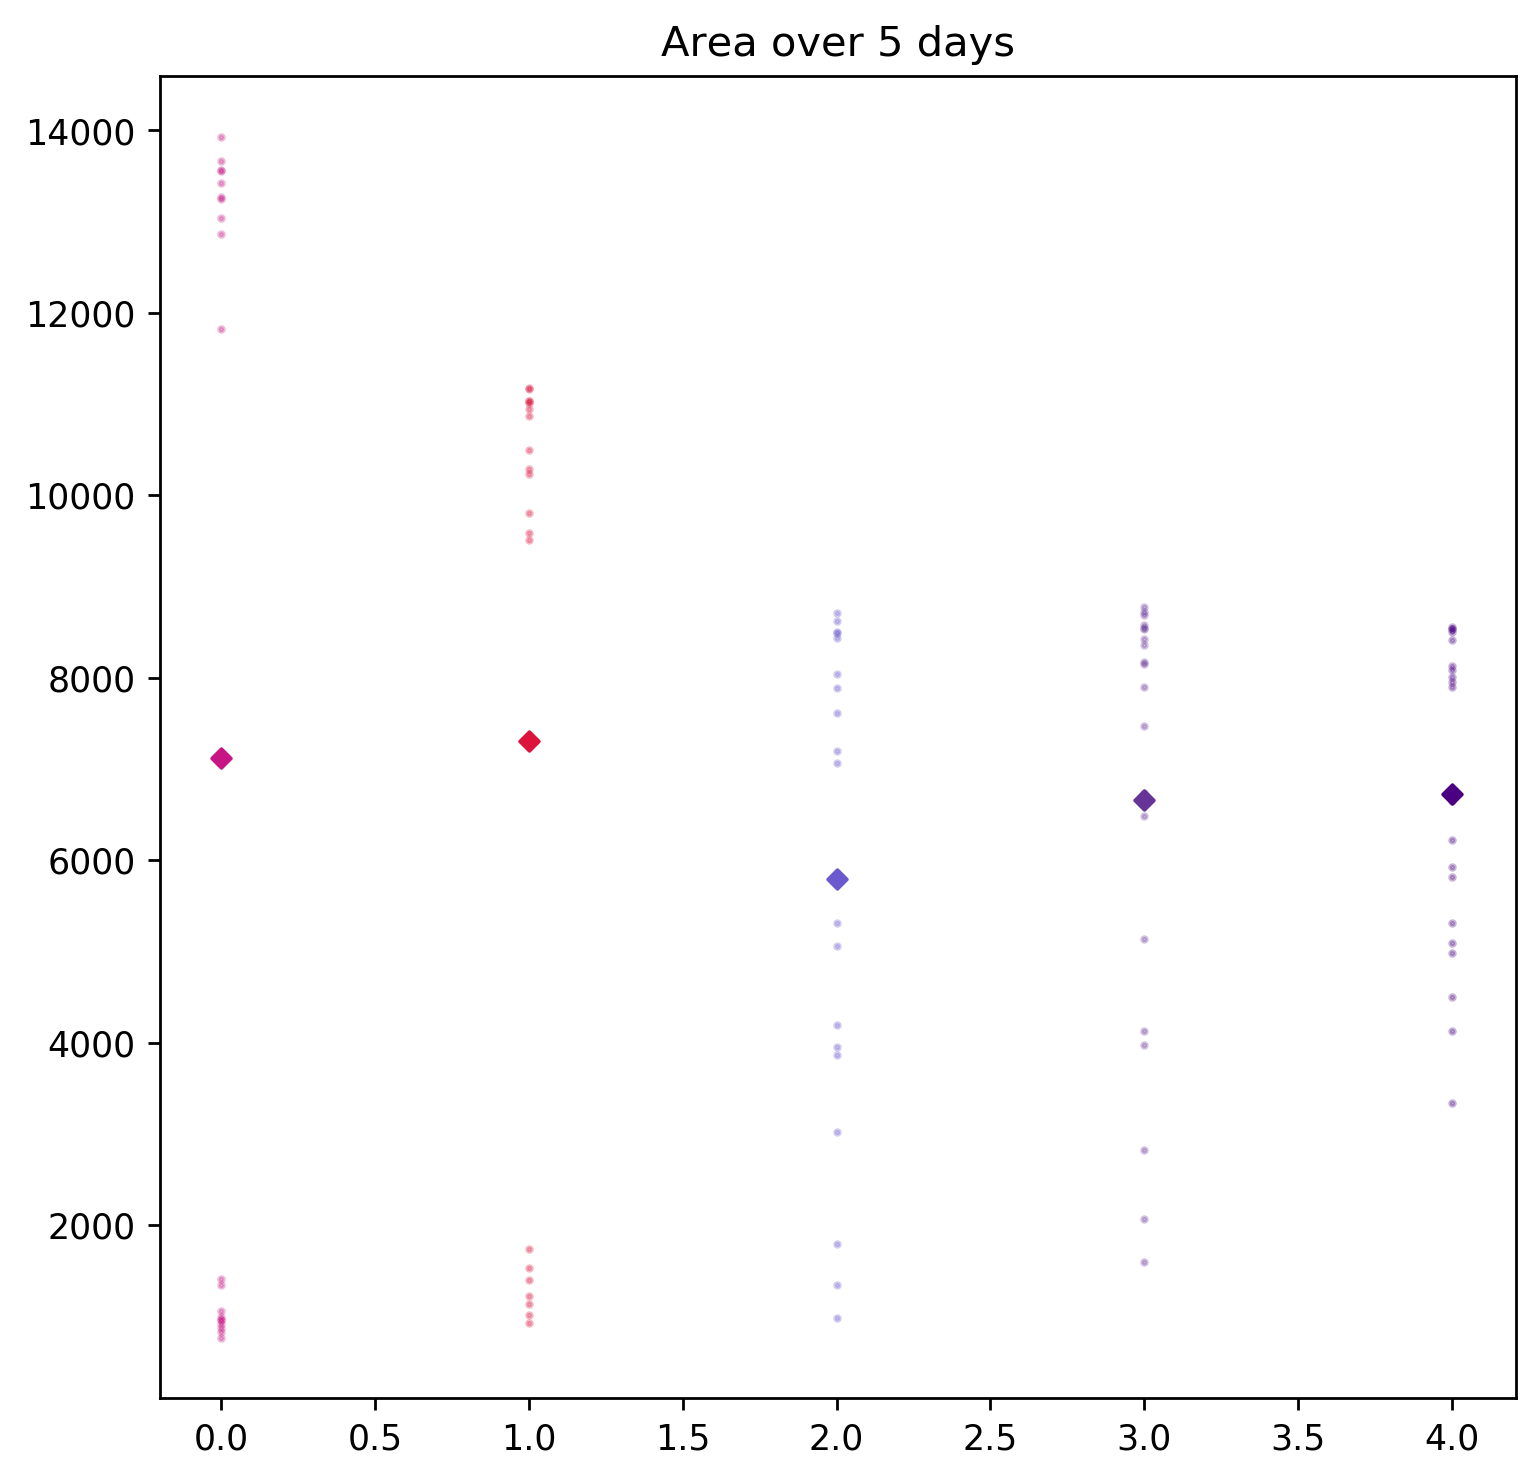

In [47]:
# Plot the graph using the function defined in the previous cell

plotSpecific(bfpN7_intensity, 'Area', means=True, stddev=False)